<a href="https://colab.research.google.com/github/eyamilabraham/my-first-classification-model-with-dense-networks/blob/main/my_first_classification_model_with_dense_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
#Downloading Fashion MNIST dataset from Zalando
data, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePR763P/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePR763P/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
#Printing metadata of dataset
metadata

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [6]:
#Splitting variables of training (60k) and testing (10k)
data_training, data_testing = data['train'], data['test']

In [7]:
#Labels of 10 possibilities
names_classes = metadata.features['label'].names

In [8]:
#Printing labels
names_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
#Normalizing metadata (transforming from 0-255 to 0-1)
#The network learns better and faster
def normalize(pictures, labels):
  pictures = tf.cast(pictures, tf.float32)
  pictures /= 255 #Transforming from 0-255 to 0-1
  return pictures, labels

#Normalize metadata of training and testing with the above function
datos_entrenamiento = data_training.map(normalize)
datos_pruebas = data_testing.map(normalize)

#Adding a cache (you have to use RAM in case of HDD or SSD, faster training)
data_training = data_training.cache()
data_testing = data_testing.cache()

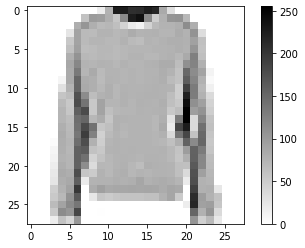

In [10]:
#Displaying the first picture of data_testing at least
for picture, label in data_training.take(1):
  break
picture = picture.numpy().reshape((28,28)) #Resizing

import matplotlib.pyplot as plt

#Drawing
plt.figure()
plt.imshow(picture, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

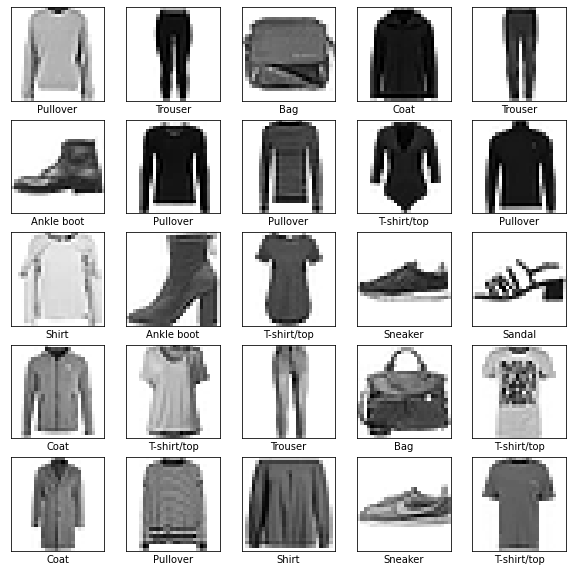

In [11]:
#More draws
plt.figure(figsize=(10,10))
for i, (picture, label) in enumerate(data_training.take(25)):
  picture = picture.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(picture, cmap=plt.cm.binary)
  plt.xlabel(names_classes[label])
plt.show()

In [12]:
#Creating the model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - B&W
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #To network classification
])

In [13]:
#Compiling the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [14]:
#Splitting training and testing data (60k y 10k)
num_ie_training = metadata.splits["train"].num_examples
num_ie_testing = metadata.splits["test"].num_examples

In [15]:
print(num_ie_training)
print(num_ie_testing)

60000
10000


In [16]:
#Batch work allows training with large amount of data to be done more efficiently
SIZE_BATCH = 32

#Shuffle y repeat data are randomly shuffled so that the network not learns the right way of the things
data_training = data_training.repeat().shuffle(num_ie_training).batch(SIZE_BATCH)
data_testing = data_testing.batch(SIZE_BATCH)

In [17]:
import math

#Training
history = model.fit(data_training, epochs=5, steps_per_epoch= math.ceil(num_ie_training/SIZE_BATCH))

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 1.5943 - accuracy: 0.6985
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6818 - accuracy: 0.7722
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6027 - accuracy: 0.7980
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6087 - accuracy: 0.7932
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5685 - accuracy: 0.8099


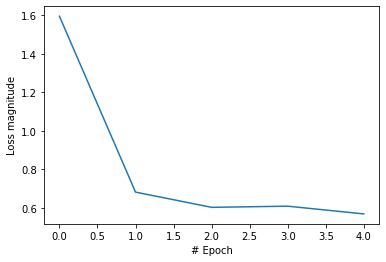

In [18]:
#Plotting the loss function
plt.xlabel("# Epoch")
plt.ylabel("Loss magnitude")
plt.plot(history.history["loss"])

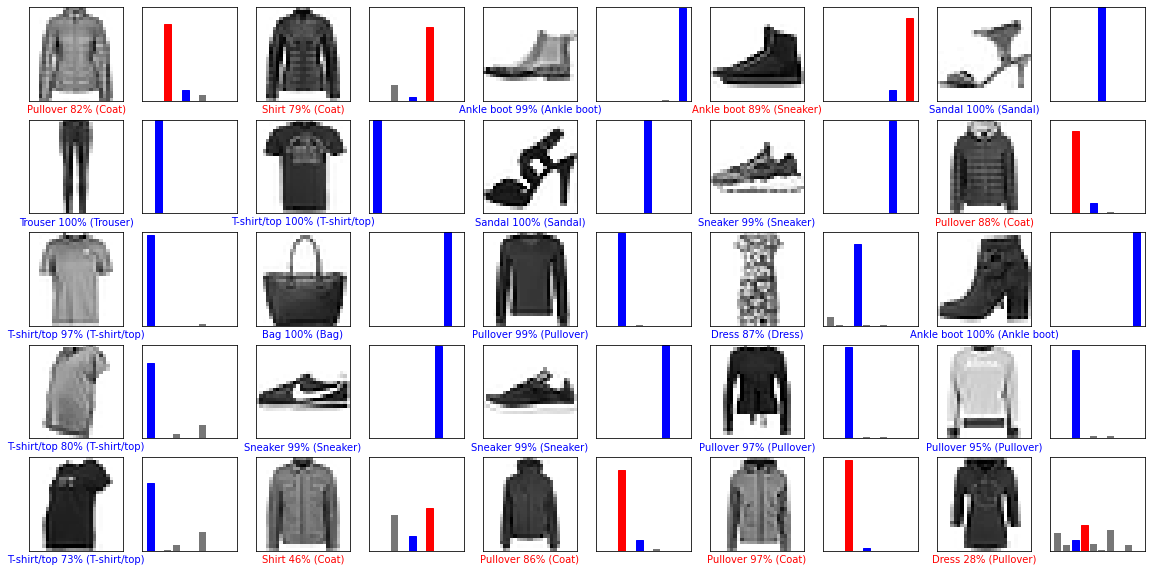

In [19]:
#Painting a grid with a lot of predictions, checking if one of them was correct (blue) or incorrect (red)
import numpy as np

for pictures_testing, labels_testing in data_testing.take(1):
  pictures_testing = pictures_testing.numpy()
  labels_testing = labels_testing.numpy()
  forecasting = model.predict(pictures_testing)
  
def plot_picture(i, arr_forecasting, labels_reals, pictures):
  arr_forecasting, label_real, img = arr_forecasting[i], labels_reals[i], pictures[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  label_forecasting = np.argmax(arr_forecasting)
  if label_forecasting == label_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(names_classes[label_forecasting],
                                100*np.max(arr_forecasting),
                                names_classes[label_real]),
                                color=color)
  
def plot_value_array(i, arr_forecasting, label_real):
  arr_forecasting, label_real = arr_forecasting[i], label_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plot = plt.bar(range(10), arr_forecasting, color="#777777")
  plt.ylim([0, 1]) 
  label_forecasting = np.argmax(arr_forecasting)
  
  plot[label_forecasting].set_color('red')
  plot[label_real].set_color('blue')
  
raws = 5
columns = 5
num_pictures = raws*columns
plt.figure(figsize=(2*2*columns, 2*raws))
for i in range(num_pictures):
  plt.subplot(raws, 2*columns, 2*i+1)
  plot_picture(i, forecasting, labels_testing, pictures_testing)
  plt.subplot(raws, 2*columns, 2*i+2)
  plot_value_array(i, forecasting, labels_testing)

In [20]:
#Testing a pic
picture = pictures_testing[4] 
picture = np.array([picture])
forecasting = model.predict(picture)

print("Forecast: " + names_classes[np.argmax(forecasting[0])])

Forecast: Sandal


In [21]:
#Exporting the h5 model
model.save('model_exported.h5')

In [22]:
#Installing tensorflowjs to convert the h5 model and next loading you could load it through a browser
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 6.1 MB/s 


In [23]:
#Transforming h5 file to tensorflowjs format
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras model_exported.h5 tfjs_target_dir

In [24]:
#Let's see if the folder was created
!ls

model_exported.h5  sample_data	tfjs_target_dir


In [25]:
#Let's see the content of the folder
!ls tfjs_target_dir

group1-shard1of1.bin  model.json
